# Customer Churn Model 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv.csv')

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA CLEANING 

In [15]:
# No Null values present in data 
df.isnull().values.any()

False

In [26]:
df.duplicated().sum()

0

In [24]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [32]:
from scipy import stats
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_outliers = df[(z_scores > 3).any(axis=1)]  # Rows with outliers in any column
print((z_scores > 3).sum())


tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [ ]:
# Data is clean and outlier free: 

# EDA Part 

### 1. Churn Count

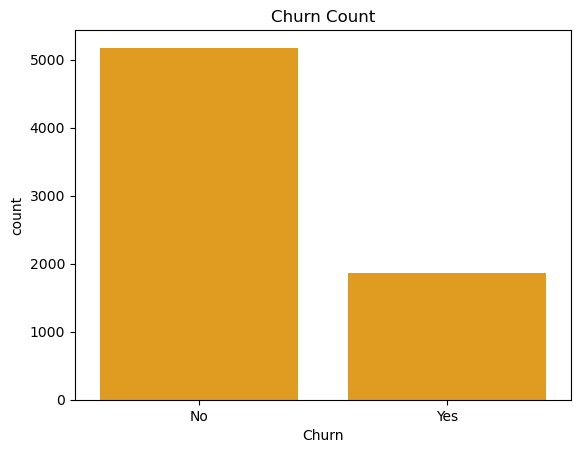

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Churn', data = df, color = 'orange')
plt.title('Churn Count')
plt.show()

In [40]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Out of 7043 total customers,
#### 5174 (73.5%) have not churned (still active)
#### 1869 (26.5%) have churned

## Tenure Distribution by Churn

In [ ]:
# Tenure is a strong churn predictor
# Retention strategies should focus on new customers (first 3–12 months)
# Offers, support, or engagement early in the customer journey can reduce churn

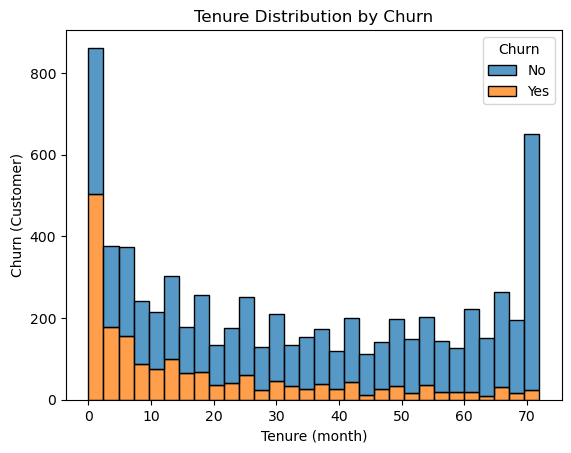

In [48]:
sns.histplot(data=df, x='tenure', hue = 'Churn', multiple = 'stack', bins = 30 )
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (month)')
plt.ylabel('Churn (Customer)')
plt.show()

### Monthly Charges Analysis 

In [51]:
Monthly_analysis = df.groupby('Churn')['MonthlyCharges'].value_counts()

In [52]:
Monthly_analysis

Churn  MonthlyCharges
No     20.05             58
       19.70             41
       19.95             41
       19.85             40
       19.90             40
                         ..
Yes    115.65             1
       116.20             1
       117.45             1
       117.80             1
       118.35             1
Name: count, Length: 2370, dtype: int64

In [ ]:
# Higher MonthlyCharges are associated with increased churn risk.
#  Low-paying customers are more likely to stay.
#  High-paying churners are a warning sign — possibly unhappy premium users.
#  Pricing strategy directly affects customer retention.

sns.boxplot(y = 'MonthlyCharges', x = 'Churn', data = df)
plt.title("Monthly Charges by Churn")
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

### Churn by Contract Type

In [55]:
Contract_analyse = df.groupby('Churn')['Contract'].value_counts()

In [56]:
Contract_analyse

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: count, dtype: int64

### Churn by Internet Service

In [57]:
Internetservice_count = df.groupby('Churn')['InternetService'].value_counts()

In [58]:
Internetservice_count

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: count, dtype: int64

In [ ]:
# DSL retains better — could be promoted as a more stable option 

# Fiber optic customers churn the most
# Out of 3,096 fiber optic users, 1297 have churned
# This is more than double the DSL churn rate
# Fiber optic needs immediate churn intervention (e.g., satisfaction surveys, plan revisions).

### Gender wise churn 

In [60]:
gender_count = df.groupby('Churn')['gender'].value_counts()

In [61]:
gender_count

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

In [63]:
# Churn rates are nearly identical across genders
# Male churn rate: 26.4%
# Female churn rate: 26.6%
# Insight: Gender does not appear to significantly influence churn behavior.

# Model  Building and Encoding Part: 

#### Encoding 

In [75]:
df_original = df.copy()  # BEFORE encoding

In [76]:
df_original.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,Yes,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,No,DSL,2,No,2,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2,1,No,DSL,2,Yes,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,DSL,2,No,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,No,Fiber optic,0,No,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [66]:
df.info()
# need to convert all obj variable to bool 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [65]:
# Removing unnecessary columns
df.drop('customerID', axis = 1, inplace= True )

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

In [70]:
from sklearn.preprocessing import LabelEncoder

In [132]:
# one hot encoding on 2 cate variable 
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
              'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col]) 

In [134]:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 
                  'PaymentMethod']

df = pd.get_dummies(df, columns= multi_cat_cols, drop_first=True)


KeyError: "None of [Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',\n       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\n       'Contract', 'PaymentMethod'],\n      dtype='object')] are in the [columns]"

In [78]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_2,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,No,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,No,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,No,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,No,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,No,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,Yes,...,False,False,False,False,False,False,False,False,False,True


In [135]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_1', 'DeviceProtection_2',
       'TechSupport_1', 'TechSupport_2', 'StreamingTV_1', 'StreamingTV_2',
       'StreamingMovies_1', 'StreamingMovies_2', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [145]:
df.isnull().values.any()

False

In [146]:
print(df.isnull().sum())

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_1                         0
OnlineSecurity_2                         0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_1                       0
DeviceProtection_2                       0
TechSupport_1                            0
TechSupport_2                            0
StreamingTV_1                            0
StreamingTV

In [148]:
df = df[df['TotalCharges'].notnull()]
df = df.dropna(subset=['TotalCharges'])

In [149]:
print(df.isnull().sum())

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_1                         0
OnlineSecurity_2                         0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_1                       0
DeviceProtection_2                       0
TechSupport_1                            0
TechSupport_2                            0
StreamingTV_1                            0
StreamingTV

In [150]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test = true values, y_pred = predicted values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

[[928 105]
 [198 176]]


In [ ]:
# High precision (0.82) and recall (0.90) — model confidently and correctly identifies most of the loyal customers.

# Significantly better performance on "Churn"
# Precision = 0.63 → Over 60% of churn predictions are correct.

# Recall = 0.47 → Nearly half of actual churners are detected (much better than your earlier ~0.18).

# F1-score = 0.54 → Decent balance between precision and recall.

# Overall accuracy = 78%
# This is strong, especially for a churn prediction problem (which is often imbalanced).

